In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math as mt
from mpl_toolkits.mplot3d import Axes3D

<div align = "justify">Retomamos el clásico planteamiento de sistema de ecuaciones lineal $\mathbf{Ax = y}$, donde $\mathbf{A}$ es una matriz $\mathbf{m~x~n}$, $\mathbf{x~\epsilon~R^n}$ y $\mathbf{y~\epsilon~R^m}$, donde generalmente se  conoce el vector de salida $\mathbf{y}$ y la matriz de coeficientes $\mathbf{A}$ y se puede hallar el vector $\mathbf{x}$. Sin embargo este sistema de ecuaciones puede llegar a tener otra interpretación desde la óptica de las <b>Transformaciones Lineales</b>: supongamos que $\mathbf{A}$ y $\mathbf{x}$ se conocen. Entonces la ecuación $\mathbf{Ax = y}$ se lee como "proporcione una $\mathbf{x}$ en $\mathbf{R^n}$ y le daré una $\mathbf{y}$ en $\mathbf{R^m}$ ". </div><br>

<div align = "justify"> Si el vector $\mathbf{x}$ es unitario bajo la norma $L_2$, entonces representa el círculo unitario. Adicionalmente, si la matriz $\mathbf{A}$ es cuadrada entonces la transformación lineal queda en el mismo espacio $\mathbf{R^n}$. Con estos ingredientes, al aplicar la transformación lineal sobre el circulo unitario (dominio) se obtiene una Elipse como imagen. ¿Qué ocurre con los vectores originales? Se estiraron y rotaron respecto al origen.</div>

$$
\left[\begin{array}{c}
x_i \\
y_i
\end{array}\right]~donde~x_i^2 + y_i^2 = 1
$$

In [2]:
def unitCircle():
    thetaRad = np.linspace(0,2*np.pi,100)
    x = np.zeros((1,len(thetaRad)))
    y = np.zeros((1,len(thetaRad)))
    x = np.cos(thetaRad)
    y = np.sin(thetaRad)
    return x,y

def simplePlot(x,y):
    fig, ax = plt.subplots(1, 1)
    ax.plot(x,y,"-k")
    ax.grid()
    ax.axis("equal")
    return ax

def vectorTrans(A):
    x,y = unitCircle()
    circleXY = np.vstack((x,y))
    transform = A @ circleXY
    
    x_sample1 = circleXY[:, 20]
    x_sample2 = circleXY[:, 99]
    
    t_sample1 = transform[:, 20]
    t_sample2 = transform[:, 99]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
    plt.subplots_adjust(wspace=0.4)
    
    ax1.plot(circleXY[0,:], circleXY[1,:], color='b')
    ax1.quiver(0, 0, x_sample1[0], x_sample1[1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
    ax1.quiver(0, 0, x_sample2[0], x_sample2[1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
    ax1.set_xlabel('x', fontsize=14)
    ax1.set_ylabel('y', fontsize=14)
    ax1.set_xlim([-4,4])
    ax1.set_ylim([-4,4])
    ax1.set_aspect('equal')
    ax1.grid(True)
    ax1.set_axisbelow(True)
    ax1.set_title("Original vectors")
    ax1.axhline(y=0, color='k')
    ax1.axvline(x=0, color='k')
    ax1.text(0.3, 1.2, "$\mathbf{x_1}$", color='b', fontsize=14)
    ax1.text(1.2, 0.2, "$\mathbf{x_2}$", color='r', fontsize=14)
    
    ax2.plot(transform[0, :], transform[1, :], color='b')
    ax2.quiver(0, 0, t_sample1[0], t_sample1[1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
    ax2.quiver(0, 0, t_sample2[0], t_sample2[1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)

    ax2.set_xlabel('x', fontsize=14)
    ax2.set_ylabel('y', fontsize=14)
    ax2.set_xlim([-4,4])
    ax2.set_ylim([-4,4])
    ax2.set_aspect('equal')
    ax2.grid(True)
    ax2.set_axisbelow(True)
    ax2.set_title("New vectors after transformation")
    ax2.axhline(y=0, color='k')
    ax2.axvline(x=0, color='k')
    ax2.text(2.5, 2.3, "$\mathbf{t_1}$", color='b', fontsize=14)
    ax2.text(2.6, 0.4, "$\mathbf{t_2}$", color='r', fontsize=14)
    plt.savefig('2.png', dpi=300, bbox_inches='tight')
    
    return ax1,ax2
    
def eigenV(B):
    lam, u = np.linalg.eig(B)
    print("lam=", np.round(lam, 4))
    print("u=", np.round(u, 4))
    return lam, u

def eigenTrans(A, lam, u):
    x,y = unitCircle()
    circleXY = np.vstack((x,y))
    transform = A @ circleXY
    
    x_sample1 = u[:,0]
    x_sample2 = u[:,1]
    
    t_sample1 = u[:,0]*lam[0]
    t_sample2 = u[:,1]*lam[1]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
    plt.subplots_adjust(wspace=0.4)
    
    ax1.plot(circleXY[0,:], circleXY[1,:], color='b')
    ax1.quiver(0, 0, x_sample1[0], x_sample1[1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
    ax1.quiver(0, 0, x_sample2[0], x_sample2[1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
    ax1.set_xlabel('x', fontsize=14)
    ax1.set_ylabel('y', fontsize=14)
    ax1.set_xlim([-4,4])
    ax1.set_ylim([-4,4])
    ax1.set_aspect('equal')
    ax1.grid(True)
    ax1.set_axisbelow(True)
    ax1.set_title("Original vectors")
    ax1.axhline(y=0, color='k')
    ax1.axvline(x=0, color='k')
    ax1.text(u[0,0]+0.1, u[1,0]+0.1, "$\mathbf{x_1}$", color='b', fontsize=14)
    ax1.text(u[0,1]-0.3, u[1,1]+0.2, "$\mathbf{x_2}$", color='r', fontsize=14)
    
    ax2.plot(transform[0, :], transform[1, :], color='b')
    ax2.quiver(0, 0, t_sample1[0], t_sample1[1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
    ax2.quiver(0, 0, t_sample2[0], t_sample2[1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)

    ax2.set_xlabel('x', fontsize=14)
    ax2.set_ylabel('y', fontsize=14)
    ax2.set_xlim([-4,4])
    ax2.set_ylim([-4,4])
    ax2.set_aspect('equal')
    ax2.grid(True)
    ax2.set_axisbelow(True)
    ax2.set_title("New vectors after transformation")
    ax2.axhline(y=0, color='k')
    ax2.axvline(x=0, color='k')
    ax2.text(t_sample1[0]+0.2, t_sample1[1]+0.2, "$\mathbf{t_1}$", color='b', fontsize=14)
    ax2.text(t_sample2[0]-0.2, t_sample2[1]+0.2, "$\mathbf{t_2}$", color='r', fontsize=14)
    plt.savefig('2.png', dpi=300, bbox_inches='tight')
    
    return ax1,ax2

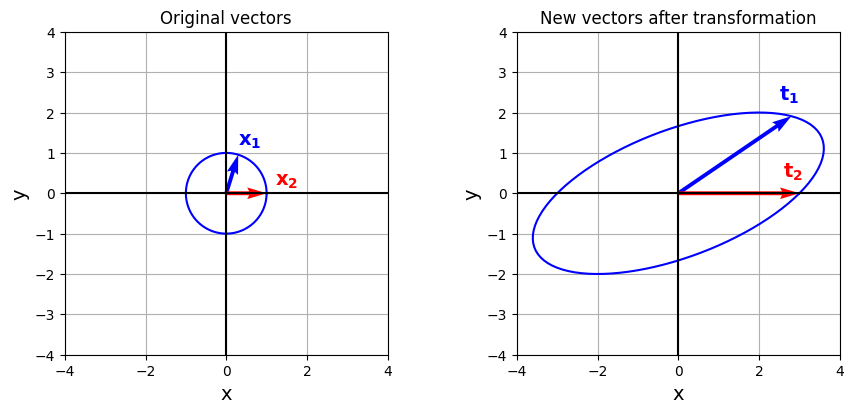

In [3]:
A = np.array([[3, 2],
              [0, 2]]) 

ax1,ax2 = vectorTrans(A)

<div align = "justify"> En este contexto ¿Qué signficaría hallar los autovalores y autovectores de la matriz de transformación? Signifca que se hallan un conjunto de vectores unitarios y linealmente indepentientes tal que al multiplicarse por la matriz de transformación se obtiene un mismo número de vectores paralelos a los autovectores y modulados por un factor $\lambda$. La diferencia con el caso anterior es que el dominio no rota, sólo se escala dado el planteamiento de los autovalores y autovectores: </div>

$$
\mathbf{Au_i = \lambda u_i}
$$

lam= [3. 2.]
u= [[ 1.     -0.8944]
 [ 0.      0.4472]]


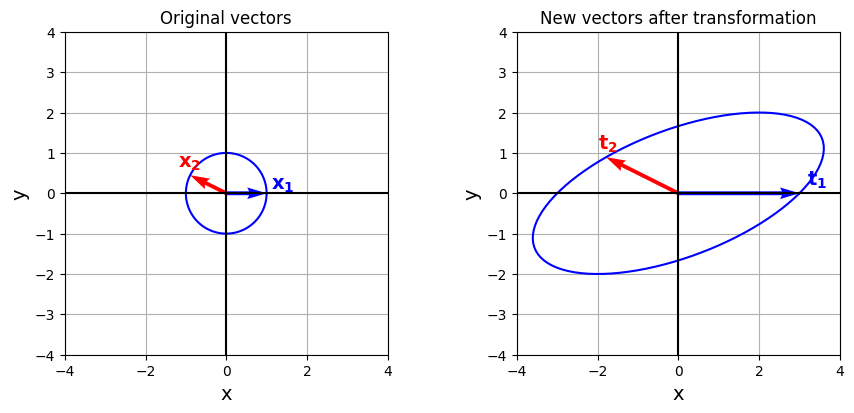

In [4]:
lam, u = eigenV(A)
ax1, ax2 = eigenTrans(A, lam, u)

<div align = "justify"> ¿Qué signficaría hallar los autovalores y autovectores de una matriz simétrica de transformación? Signifca que se hallan un conjunto de vectores unitarios, linealmente indepentientes y ortogonales tal que al multiplicarse por la matriz de transformación se obtiene un mismo número de vectores paralelos a los autovectores y modulados por un factor $\lambda$. Lo más interesante es que los vectores escalados $t_1$ y $t_2$ representan los ejes mayores de la elipse </div> <br>

<div align = "justify"> En este caso los autovales $\lambda$ representa la longitud de los ejes mayores y los autovectores $u$ contienen su dirección. De las matrices simétricas se pueden encontrar propiedades muy útiles:</div>

- Sus autovalores son reales positivos.
- Sus autovectores son linealmente independientes y ortogonales.
- Posee $n$ vectores propios reales y ortonormales

lam= [3.618 1.382]
u= [[ 0.8507 -0.5257]
 [ 0.5257  0.8507]]


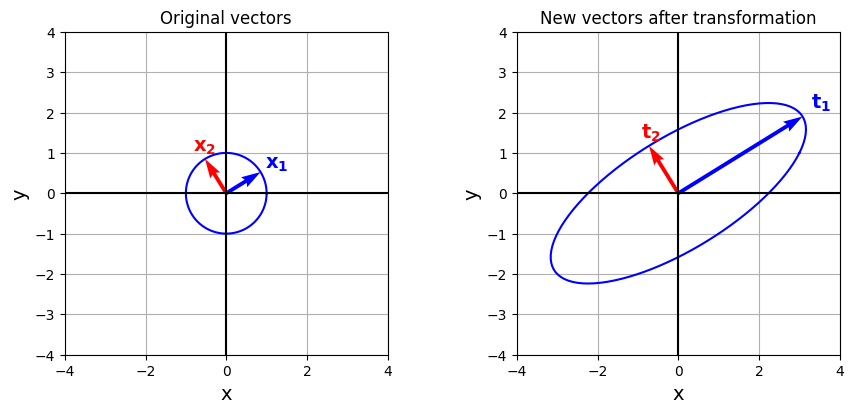

In [48]:
A = np.array([[3, 1],
              [1, 2]]) 

lam, u = eigenV(A)
ax1, ax2 = eigenTrans(A, lam, u)

<div align = "justify">Otra propiedad interesantes de la matriz simétrica es que es diagonalizable ortogonalmente. Si agrupamos los autovectores $\mathbf{u_i}$ en una matriz $\mathbf{U~\epsilon~R^{nxn}}$ ($n$ autolvalores con $n$ filas) y los autovalores los almacenamos en la diagonal de matriza $\mathbf{D~\epsilon~R^{nxn}}$, entonces podemos plantear $\mathbf{AU=UD}$. Como la matriz $\mathbf{U}$ almacena vectores ortonormales, su inversa sería la transpuesta. Al despejar $\mathbf{A}$:</div>

$$
\mathbf{A}=\left[\begin{array}{llll}
\mathbf{u}_1 & \mathbf{u}_2 & \ldots & \mathbf{u}_{\mathbf{n}}
\end{array}\right]\left[\begin{array}{cccc}
\lambda_1 & 0 & \ldots & 0 \\
0 & \lambda_2 & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots \\
0 & 0 & \ldots & \lambda_n
\end{array}\right]\left[\begin{array}{llll}
\mathbf{u}_1 & \mathbf{u}_2 & \ldots & \mathbf{u}_{\mathbf{n}}
\end{array}\right]^T
$$

Para la matriz $\mathbf{A}$ que estabamos analizando tendremos que:

$$
\mathbf{A}=\left[\begin{array}{ll}
3 & 1 \\
1 & 2
\end{array}\right]=\left[\begin{array}{cc}
0.8507 & -0.5257 \\
0.5257 & 0.8507
\end{array}\right]\left[\begin{array}{cc}
3.618 & 0 \\
0 & 1.382
\end{array}\right]\left[\begin{array}{cc}
0.8507 & 0.5257 \\
-0.5257 & 0.8507
\end{array}\right]
$$


<div align = "justify">¿Qué hacemos si la matriz es no simétrica? Digamos que es una matriz $\mathbf{A~\epsilon~R^{mxn}}$</div>

$$
\mathbf{A}=\mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^{\mathbf{T}}
$$

- $\mathbf{U}$ se conoce como <b>n left singular vectors of $\mathbf{A}$</b> y contienen la dirección de los ejes principales.
- $\mathbf{V}$ se conoce como <b>n right singular vectors of $\mathbf{A}$</b> y contienen la dirección de los ejes principales.
- $\boldsymbol{\Sigma}$ se conoce como <b>n singular values of $\mathbf{A}$</b> y contienen longitud de los ejes principales. Dichos valores singulares están ordenados de mayor a menor.

#### Full SVD (Standard)

- $\mathbf{U}$ $mxm$
- $\mathbf{V}$ es $nxn$
- $\boldsymbol{\Sigma}$ es $mxn$

#### Reduced SVD
$$
A=\hat{U} \hat{\Sigma} V^T
$$
- $\mathbf{U}$ $mxn$
- $\mathbf{V}$ es $nxn$
- $\boldsymbol{\Sigma}$ es $nxn$


In [7]:
A = np.array([[3, 1],
              [1, 2],
              [6, 5]]) 
U, s, VT = np.linalg.svd(A, full_matrices=False)
print("U=", np.round(U, 4))
print("s=", np.round(s, 4))
print("VT", np.round(VT.T, 4))

print(np.dot(U*s,VT))

U= [[-0.3454  0.7514]
 [-0.236  -0.6494]
 [-0.9083 -0.117 ]]
s= [8.5967 1.4482]
V [[-0.7819  0.6234]
 [-0.6234 -0.7819]]
[[3. 1.]
 [1. 2.]
 [6. 5.]]


In [15]:
U, s, VT = np.linalg.svd(A, full_matrices=True)
print("U=", np.round(U, 4))
print("s=", np.round(s, 4))
print("VT", np.round(VT.T, 4))

b = np.zeros((3,2))
b[0,0] = s[0]
b[1,1] = s[1]
print("s=", np.round(b, 4))
print(np.dot(np.dot(U,b),VT))

U= [[-0.3454  0.7514 -0.5623]
 [-0.236  -0.6494 -0.7229]
 [-0.9083 -0.117   0.4016]]
s= [8.5967 1.4482]
VT [[-0.7819  0.6234]
 [-0.6234 -0.7819]]
s= [[8.5967 0.    ]
 [0.     1.4482]
 [0.     0.    ]]
[[3. 1.]
 [1. 2.]
 [6. 5.]]
